In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving OSA_extreme_both.xlsx to OSA_extreme_both.xlsx
User uploaded file "OSA_extreme_both.xlsx" with length 26018 bytes


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_excel("OSA_extreme_both.xlsx")
data.OSA = data.OSA.astype("category").cat.codes
X=data[['Gender','BMI','Age','Cervical']]
y=data[['OSA']]
X_features = X.columns

scalerX = StandardScaler()
scalerX.fit(X)
X = pd.DataFrame(scalerX.transform(X))

variances = [0,0,0,0]
X=X.values
y = y.values
print(X[0:5])
print(y[0:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


[[ 0.68278267 -0.14658954 -0.74133036  0.2257535 ]
 [ 0.68278267 -0.54101462 -1.32278175 -0.09790431]
 [ 0.68278267  0.04704734 -1.32278175  0.38419391]
 [ 0.68278267  0.03297123 -0.74133036  0.38419391]
 [ 0.68278267  3.24186572 -0.07681449  0.86629213]]
[[1]
 [0]
 [0]
 [1]
 [1]]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[['OSA']]], axis = 1)

In [ ]:
pca.components_

array([[ 0.52647056,  0.46214967,  0.07294183,  0.7098774 ],
       [-0.53778381,  0.50180509,  0.67747604,  0.0025384 ]])

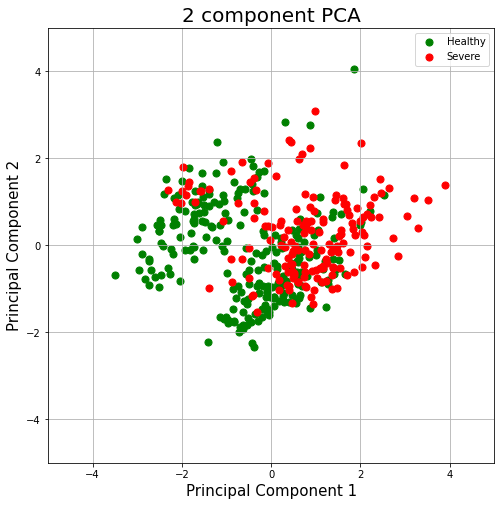

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
targets = ['Healthy','Severe']
_targets = [0,1]
colors = ['g', 'r']
for target, color in zip(_targets,colors):
    indicesToKeep = finalDf['OSA'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
variances[1]=np.sum(pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])
finalDf = pd.concat([principalDf, data[['OSA']]], axis = 1)

In [ ]:
pca.components_

array([[0.52647056, 0.46214967, 0.07294183, 0.7098774 ]])

In [ ]:
_ys

,0
0,-0.500000
1,-0.497573
2,-0.495146
3,-0.492718
4,-0.490291
...,...
407,0.487864
408,0.490291
409,0.492718
410,0.495146


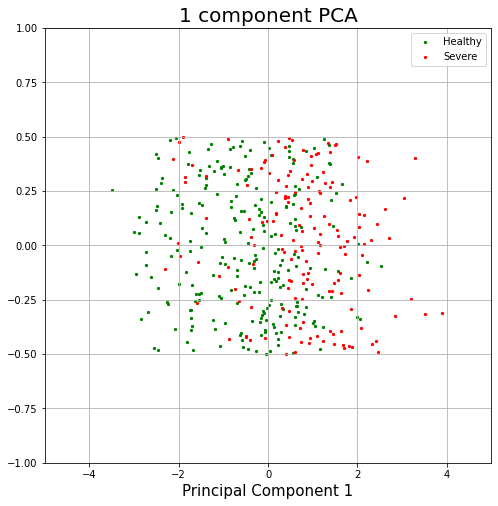

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_title('1 component PCA', fontsize = 20)
ax.set_xlim(-5,5)
ax.set_ylim(-1,1)
targets = ['Healthy','Severe']
_targets = [0,1]
colors = ['g', 'r']
_ys = pd.DataFrame(np.arange(0,len(data))/len(data)-0.5)
for target, color in zip(_targets,colors):
    indicesToKeep = finalDf['OSA'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , _ys.loc[indicesToKeep]
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

In [ ]:
variances[0]=np.sum(pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, data[['OSA']]], axis = 1)

In [ ]:
pca.components_

array([[ 0.52647056,  0.46214967,  0.07294183,  0.7098774 ],
       [-0.53778381,  0.50180509,  0.67747604,  0.0025384 ],
       [-0.38302721,  0.57039037, -0.72648854, -0.01262439]])

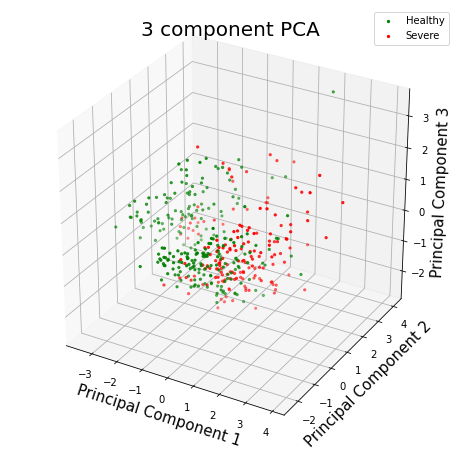

In [ ]:
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Healthy','Severe']
_targets = [0,1]
colors = ['g', 'r']
_ys = pd.DataFrame(np.arange(0,len(data))/len(data)-0.5)
for target, color in zip(_targets,colors):
    indicesToKeep = finalDf['OSA'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 5)
    
ax.legend(targets)
ax.grid()

In [ ]:
variances[2]=np.sum(pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2','principal component 3','principal component 4'])
finalDf = pd.concat([principalDf, data[['OSA']]], axis = 1)

In [ ]:
variances.append(np.sum(pca.explained_variance_ratio_))

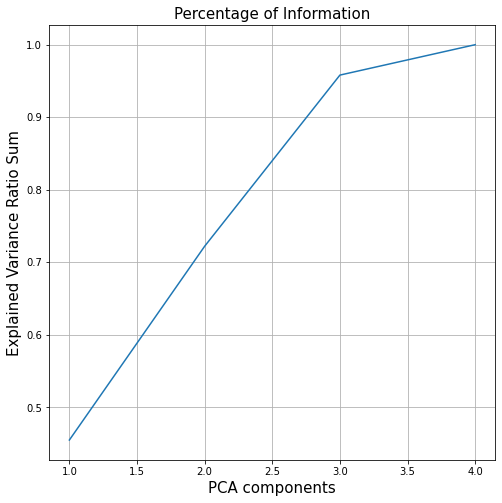

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA components', fontsize = 15)
ax.set_ylabel('Explained Variance Ratio Sum', fontsize = 15)
ax.set_title('Percentage of Information',fontsize=15)
ax.plot(np.arange(1,len(variances)+1),variances)
ax.grid()